In [37]:
import numpy as np
from PIL import Image
import pyqrcode
from pyzbar.pyzbar import decode

In [38]:
def get_qr_array(m):
    qr = pyqrcode.create(m, error='L', version=10, mode='binary')
    t = np.array([[1-int(z) for z in x] for x in qr.text().split('\n')[:-1]])
    return t

In [39]:
def qr_rgb_1_encode(frame, size=(400, 400)):
    m = ''.join(str(x) for x in np.random.randint(0, 2, (100,)).tolist())
    t = get_qr_array(m)
    rgb = np.repeat(t[:, :, np.newaxis], 3, axis=2)
    rgb = np.uint8(rgb * 255)
    img = Image.fromarray(rgb, 'RGB')
    img = img.resize(size)
    frame.paste(img)
    return frame, m

In [40]:
def qr_rgb_3_encode(frame, size=(400, 400)):
    ms = ''
    rgb = []
    for i in range(3):
        m = ''.join(str(x) for x in np.random.randint(0, 2, (100,)).tolist())
        ms += m
        rgb.append(get_qr_array(m))
    rgb = np.stack(rgb, axis=2)
    rgb = np.uint8(rgb * 255)
    img = Image.fromarray(rgb, 'RGB')
    img = img.resize(size)
    frame.paste(img)
    return frame, ms

In [44]:
def qr_rgb_1_decode(frame, size=(400, 400)):
    f = frame.crop((0, 0, size[0], size[1]))
    return decode(f)[0].data.decode('utf-8')

In [49]:
def qr_rgb_3_decode(frame, size=(400, 400)):
    f = np.array(frame.crop((0, 0, size[0], size[1])))
    ms = ''
    for i in range(3):
        t = f[:, :, i][:, :, np.newaxis]
        t = np.repeat(t, 3, axis=2)
        t = Image.fromarray(t, 'RGB')
        ms += decode(t)[0].data.decode('utf-8')
    return ms

In [50]:
frame = Image.open('frames/image-0422.png')
f, m0 = qr_rgb_1_encode(frame)
m1 = qr_rgb_1_decode(f)
print(m0 == m1)

frame = Image.open('frames/image-0422.png')
f, m0 = qr_rgb_3_encode(frame)
m1 = qr_rgb_3_decode(f)
print(m0 == m1)

True
True


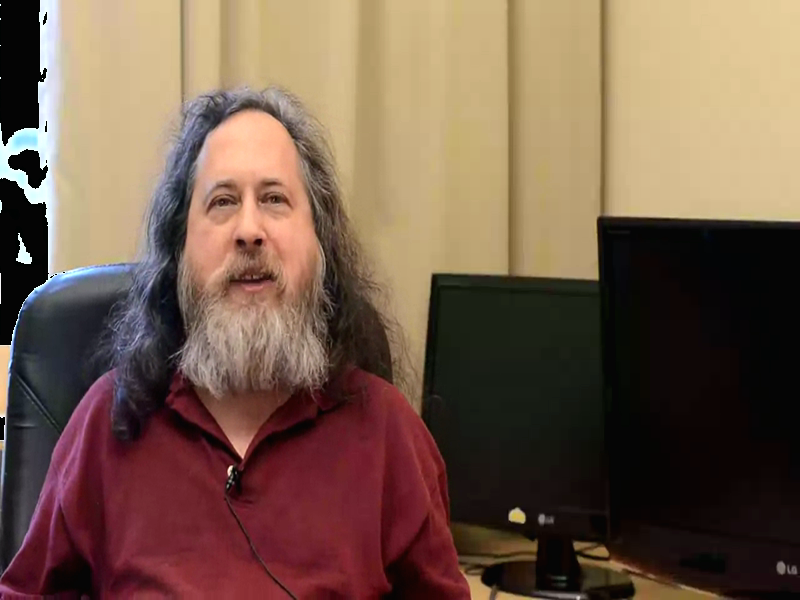

In [138]:
frame = Image.open('frames/image-0422.png')
# f = np.array(frame.convert('HSV'))
f = np.array(frame.convert('YCbCr'))
print(np.max(f[:, :, 0]), np.min(f[:, :, 0]))
f[:, :, 0] = np.clip(f[:, :, 0] + 5, 0, 255)
# img = Image.fromarray(f, 'HSV')
img = Image.fromarray(f, 'YCbCr')
img.convert('RGB')